In [278]:
import numpy as np
import matplotlib.pyplot as plt

In [279]:
color_list = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black',
    'orange',
    'purple',
    'pink'
]
num_lines = 1
canvas_w = 800
canvas_h = 600
critical_points = [(0, 0), (0, canvas_h), (canvas_w, canvas_h), (canvas_w, 0)]
critical_x = [p[0] for p in critical_points] + [critical_points[0][0]]
critical_y = [p[1] for p in critical_points] + [critical_points[0][1]]

In [304]:
# Let's write the function that can define m coefficient

def find_m(angle_rad: float, point: tuple[float]) -> float:
    y_coord = point[1]
    x_coord = point[0]


    return y_coord - np.tan(angle_rad)*x_coord

In [319]:
angle = 75.96375653207353
angle_rad = np.deg2rad(angle)
tan_angle = np.round(np.tan(angle_rad),4)


print(tan_angle)
print(np.rad2deg(np.arctan(4)))



4.0
75.96375653207353


In [280]:
random_angles = np.random.rand(num_lines)*2*np.pi

In [303]:
# we have to define m coef: y = kx + m; m = y - kx

m_dict = {}
m_dict_max_min = {}
for angle in random_angles:
    print(f'Tan angle: {np.tan(angle)}. Rad: {angle}. Deg: {np.rad2deg(angle)}')
    for point in critical_points:
        m = point[1] - (np.tan(angle) * point[0])
        print(f'Point: {point}')
        print(f'M: {m}')
        print(f'{(np.tan(angle) * point[0])+m - point[1]}')


    m_coefs = [point[1] - np.tan(angle) * point[0] for point in critical_points]
    m_dict[angle] = m_coefs
    m_dict_max_min[angle] = [min(m_coefs), max(m_coefs)]





Tan angle: -3.0956805544037467. Rad: 5.024838727166204. Deg: 287.902051800512
Point: (0, 0)
M: 0.0
0.0
Point: (0, 600)
M: 600.0
0.0
Point: (800, 600)
M: 3076.5444435229974
0.0
Point: (800, 0)
M: 2476.5444435229974
0.0


In [282]:
m_dict_max_min

{5.024838727166204: [0.0, 3076.5444435229974]}

In [283]:
m_dict

{5.024838727166204: [0.0, 600.0, 3076.5444435229974, 2476.5444435229974]}

In [302]:
for idx, tan_angle in enumerate(m_dict):
    for cr_idx, critical_point in enumerate(critical_points):
        print(f'Critical point: {critical_point}')
        cur_x = critical_point[0]
        cur_y = critical_point[1]
        print(m_dict[tan_angle][cr_idx])
        print(f'Equation: {tan_angle*cur_x + m_dict[tan_angle][cr_idx]-cur_y}')



Critical point: (0, 0)
0.0
Equation: 0.0
Critical point: (0, 600)
600.0
Equation: 0.0
Critical point: (800, 600)
3076.5444435229974
Equation: 6496.41542525596
Critical point: (800, 0)
2476.5444435229974
Equation: 6496.41542525596


Cur x: 0. Cur y: 0.0
Cur x: 0. Cur y: 600.0
Cur x: 800. Cur y: 7096.41542525596
Cur x: 800. Cur y: 6496.41542525596


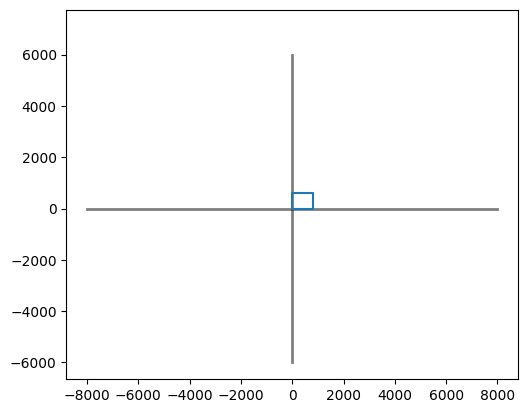

In [290]:
plt.plot([-canvas_w*10, canvas_w*10], [0,0], 'k-', alpha=.5, linewidth=2)
plt.plot([0,0], [-canvas_h*10, canvas_h*10], 'k-', alpha=.5, linewidth=2)
plt.plot(critical_x, critical_y)

delta = 300000
for tan_angle_idx, tan_angle in enumerate(m_dict):
    for m_idx, m in enumerate(m_dict[tan_angle]):
        central_point = critical_points[m_idx]
        cur_x = central_point[0]
        cur_y = central_point[1]
        print(f'Cur x: {cur_x}. Cur y: {tan_angle*cur_x+m}')
        plt.plot([cur_x], [tan_angle*cur_x+m], color='r')


plt.gca().set_aspect('equal')
# plt.axis([-canvas_w*1.1, canvas_w*1.1, -canvas_h*1.1, canvas_h*1.1])
plt.show()